In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import *
from torch.utils.data import DataLoader

# Pré-processamento dos dados

In [2]:
train_path = 'Dataset/CNN/train'
test_path = 'Dataset/CNN/test'

In [3]:
transform = transforms.Compose(
    [transforms.Resize(size = (512,512)), 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
train_dataset = datasets.ImageFolder(train_path, transform = transform)
test_dataset = datasets.ImageFolder(test_path, transform = transform)

In [31]:
trainloader = DataLoader(train_dataset, batch_size = 30, shuffle = True)
testloader = DataLoader(test_dataset, batch_size = 90, shuffle = True)

# Implementação da arquitetura CNN

In [6]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
    
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
    
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
    
    nn.Flatten(),
    
    nn.Linear(128 * 64 * 64, 128),
    nn.ReLU(),
    
    nn.Linear(128, 64),
    nn.ReLU(),
    
    nn.Linear(64, 3)
)        

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=524288, out_features=128, bias=True)
  (14): ReLU()
  (15): Linear(in_features=128, out_features=64, bias=True)
  (16): ReLU()
  (17): Linear(in_feat

In [8]:
num_epoch = 30
learning_rate = 0.001

In [9]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [10]:
train_losses = []
train_acc = []

for epoch in range(num_epoch):
    model.train()
    running_train_loss = 0.0

    for inputs, labels in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(trainloader)
    train_losses.append(train_loss)

    _, predicted = torch.max(outputs.data, 1)
    acc = accuracy_score(labels, predicted)
    train_acc.append(acc)

    print(f"Época {epoch + 1}/{num_epoch} - Perda no treinamento: {train_loss:.6f} - Acurácia: {acc:.2f}")

Época 1/30 - Perda no treinamento: 23.519670 - Acurácia: 0.67
Época 2/30 - Perda no treinamento: 3.110495 - Acurácia: 0.93
Época 3/30 - Perda no treinamento: 2.873201 - Acurácia: 0.87
Época 4/30 - Perda no treinamento: 0.975800 - Acurácia: 1.00
Época 5/30 - Perda no treinamento: 0.486897 - Acurácia: 1.00
Época 6/30 - Perda no treinamento: 0.022611 - Acurácia: 1.00
Época 7/30 - Perda no treinamento: 0.025354 - Acurácia: 1.00
Época 8/30 - Perda no treinamento: 0.063726 - Acurácia: 1.00
Época 9/30 - Perda no treinamento: 0.007119 - Acurácia: 1.00
Época 10/30 - Perda no treinamento: 0.027178 - Acurácia: 1.00
Época 11/30 - Perda no treinamento: 0.000036 - Acurácia: 1.00
Época 12/30 - Perda no treinamento: 0.000002 - Acurácia: 1.00
Época 13/30 - Perda no treinamento: 0.006056 - Acurácia: 1.00
Época 14/30 - Perda no treinamento: 0.004654 - Acurácia: 1.00
Época 15/30 - Perda no treinamento: 0.000015 - Acurácia: 1.00
Época 16/30 - Perda no treinamento: 0.009548 - Acurácia: 1.00
Época 17/30 - Pe

Text(0.5, 0.98, 'Treinamento')

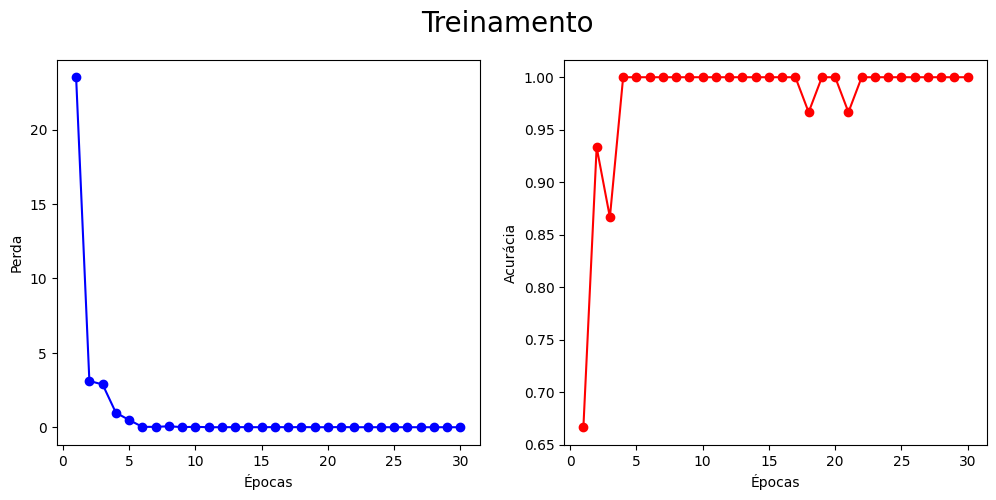

In [20]:
epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'ro-')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.suptitle("Treinamento", fontsize = 20)

In [32]:
model.eval()
    
with torch.no_grad():
        
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        acc = accuracy_score(labels, predicted)
        
print(f"Acurácia: {acc:.2f}")

Acurácia: 0.98


# Métricas de avaliação

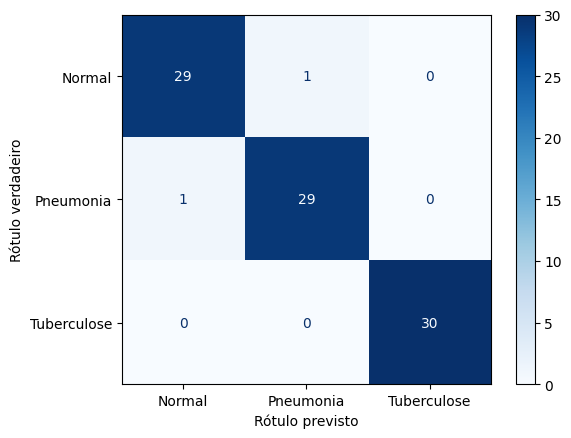

In [35]:
cm = confusion_matrix(labels, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculose'])
disp.plot(cmap=plt.cm.Blues)

plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.show()

In [40]:
precision = precision_score(labels, predicted, average='weighted')
print(f"Precisão: {precision:.2f}")

Precisão: 0.98


In [41]:
recall = recall_score(labels, predicted, average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 0.98


In [42]:
f1 = f1_score(labels, predicted, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.98
